Import modules

In [1]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read spam.csv

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/SPAM.csv")

Calculate the number of texts

In [3]:
texts = []
labels = []

for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)

print("number of texts :" , len(texts))
print("number of labels:", len(labels))

number of texts : 5459
number of labels: 5459


Split dataset into train and test sets

In [5]:
train = int(len(texts) * 0.8)
test = int(len(texts) - train)

print("The number of train is {0}, test is {1} ".format(train, test))

The number of train is 4367, test is 1092 


Tokenize

In [6]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

Found 8546 unique words: 
data shape:  (5459, 500)


In [7]:
x_train = data[:train]
y_train = labels[:train]

x_test = data[train:]
y_test = labels[train:]

print("x_train's shape is {0}, y_train's shape is {1}".format(x_train.shape, y_train.shape))
print("x_test's shape is {0}, y_test's shape is {1}".format(x_test.shape, y_test.shape))

x_train's shape is (4367, 500), y_train's shape is (4367,)
x_test's shape is (1092, 500), y_test's shape is (1092,)


Create model

In [9]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

In [10]:
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model_rnn.fit(x_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
59/59 [==============================] - 9s 117ms/step - loss: 0.3845 - acc: 0.8609 - val_loss: 0.2237 - val_acc: 0.9085
Epoch 2/10
59/59 [==============================] - 7s 112ms/step - loss: 0.1081 - acc: 0.9719 - val_loss: 0.0750 - val_acc: 0.9817
Epoch 3/10
59/59 [==============================] - 7s 113ms/step - loss: 0.0628 - acc: 0.9823 - val_loss: 0.0548 - val_acc: 0.9863
Epoch 4/10
59/59 [==============================] - 7s 112ms/step - loss: 0.0756 - acc: 0.9725 - val_loss: 0.0538 - val_acc: 0.9863
Epoch 5/10
59/59 [==============================] - 9s 162ms/step - loss: 0.0285 - acc: 0.9917 - val_loss: 0.0485 - val_acc: 0.9863
Epoch 6/10
59/59 [==============================] - 14s 235ms/step - loss: 0.0225 - acc: 0.9928 - val_loss: 0.0456 - val_acc: 0.9886
Epoch 7/10
59/59 [==============================] - 9s 151ms/step - loss: 0.0133 - acc: 0.9969 - val_loss: 0.0495 - val_acc: 0.9874
Epoch 8/10
59/59 [==============================] - 8s 139ms/step - loss: 0

Plot training history (acc and loss)

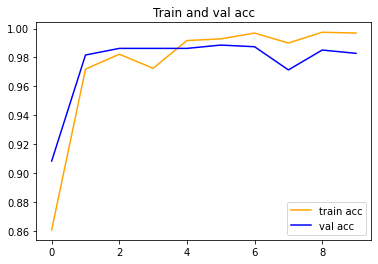

In [11]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
epochs = range(len(acc))

plt.plot(epochs, acc, color='orange', label='train acc')
plt.plot(epochs, val_acc, color='blue', label='val acc')
plt.title('Train and val acc')
plt.legend()
plt.savefig('acc.png')
plt.show()

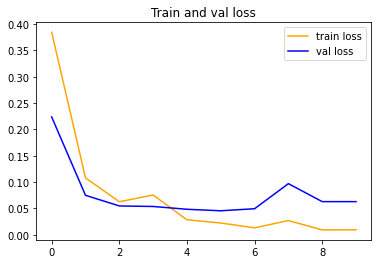

In [12]:
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
plt.plot(epochs, loss, color='orange', label='train loss')
plt.plot(epochs, val_loss, color='blue', label='val loss')
plt.title('Train and val loss')
plt.legend()
plt.savefig('loss.png')
plt.show()

Plot ROC Curve（[Reference](https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/)）

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_pred_rnn = model_rnn.predict(x_test).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)

35/35 [==============================] - 1s 23ms/step


In [14]:
from sklearn.metrics import auc
auc_rnn = auc(fpr_rnn, tpr_rnn)

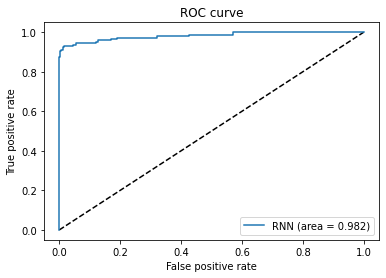

In [15]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('ROC Curve.png')
plt.show()

Plot confusion matrix

35/35 [==============================] - 1s 23ms/step


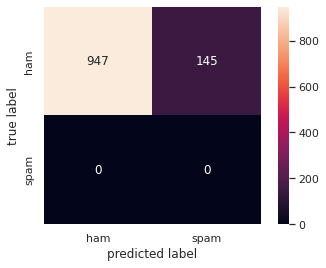

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model_rnn.predict(x_test)

labels = ['ham', 'spam']

# use seaborn plotting defaults
import seaborn as sns; sns.set()

y_pred = np.argmax(y_pred,axis=1)

plt.figure()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, xticklabels=labels,yticklabels=labels)
plt.xlabel('predicted label')
plt.ylabel('true label');
plt.savefig('Cof matrix')

In [19]:
from sklearn.metrics import balanced_accuracy_score

bacc = balanced_accuracy_score(y_test, y_pred)
print("RNN balanced_accuracy_score: ", bacc)

RNN balanced_accuracy_score:  0.5
